<a href="https://www.kaggle.com/code/yacharki/cross-testing-binary-cnn-models-amazon-yelp?scriptVersionId=194163859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Testing my Pretrained Binary Text Classification cnn models**

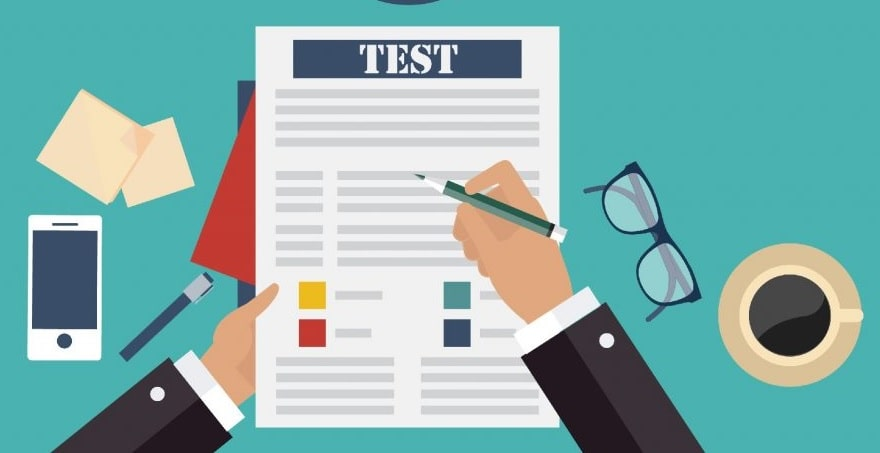

1. Imports and Downloads
2. Functions
3. Loading Models (Trained on Amazon reviews/Yelp reviews)
4. Loading and Shuffeling the test Data 
5. Partitioning the Data and Filtering columns
6. Preprocessing and Tokenization
7. Padding and Label Encoding 
8. Cross-Evaluating the model on Yelp and Amazon Reviews
9. Evaluating the models on Manually Inputted Reviews

Yelp Model Creation and Training : https://www.kaggle.com/code/yacharki/binary-text-classification-yelp-reviews-90-cnn 

Amazon Model Creation and Training : https://www.kaggle.com/code/yacharki/binary-text-classification-amazon-reviews-86-cnn

This Notebook on Google Colab : https://colab.research.google.com/drive/1qVRNMv7zNaWlrKI5jhlkp3LS8aXmbt2m?usp=sharing

This Notebook on Github : https://github.com/yassiracharki/DeepLearningProjrects/blob/main/testing_Binary_cnn_models_amazon_yelp_reviews.ipynb

# 1. Imports and Downloads

In [1]:
# Downloads
!pip install contractions
!pip install textsearch
!pip install tqdm

import nltk
nltk.download('punkt')

# Fundamental classes
from tensorflow import keras
import pandas as pd
import numpy as np

# Time
import time
import datetime

#Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata

seed = 3541
np.random.seed(seed)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 15.6 MB/s eta 0:00:00
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# 2. Functions

In [2]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [3]:
# Pre-Processing Function

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    norm_docs.append(doc)
  
  return norm_docs

# 3. Loading Models (Trained on Amazon reviews/Yelp reviews)

In [4]:
# Loading the model Trained on Amazon reviews
modelAmazon = keras.models.load_model('../input/binary-classification-model-amazon-reviews-86pt/Binary_Classification_86_Amazon_Reviews_CNN.h5')

# Loading the model Trained on Yelp reviews
modelYelp = keras.models.load_model('../input/binary-classification-90-yelp-reviews-cnn/Binary_Classification_90_Yelp_Reviews_CNN.h5')

# 4. Loading and Shuffeling the test Data 

In [5]:
#Loading  Yelp test data
dataset_test_yelp = pd.read_csv('../input/yelp-reviews-for-sentianalysis-binary-np-csv/yelp_review_sa_binary_csv/test.csv')

#Loading  Amazon test data
dataset_test_Amazon = pd.read_csv('../input/amazon-reviews-for-sa-binary-negative-positive-csv/amazon_review_sa_binary_csv/test.csv')

#Loading  Amazon train data (to be used on the label encoder)
dataset_train_Amazon = pd.read_csv('../input/amazon-reviews-for-sa-binary-negative-positive-csv/amazon_review_sa_binary_csv/train.csv')

# Creating  Manual test dataset
M_data = {'class_index': [1,2,1,1,2,2,1,2], 'review_text': ['this is actual crap !!','this is a good movie, i like it','i dont know about you, but is there anyone who actually liked this ?','wtf is this shit ?! is this even legal to show ?','hmmm its kind of decent, i kinda like it','the best movie i ever watched','i can summeries this in one phrase, below average','i think i actually like this movie']}  
  
# Converting M_data to a data frame   
M_data = pd.DataFrame(M_data) 

# Shuffeling the Test Data
test_yelp = dataset_test_yelp.sample(frac=1)
test_Amazon = dataset_test_Amazon.sample(frac=1)
train_Amazon = dataset_train_Amazon.sample(frac=1)
M_data = M_data.sample(frac=1)



# 5. Partitioning the Data and Filtering columns

In [6]:
# Taking a tiny portion of the data base (because it will only be used on the label encoder)
train_Amazon = dataset_train_Amazon.iloc[:100,:]

# Taking only 38000 reviews to even out the odds with the Yelp data reviews
test_Amazon = test_Amazon.iloc[:38000,:]

# Taking only neccessery columns
X_test_yelp = test_yelp['review_text'].values
y_test_yelp = test_yelp['class_index'].values
X_test_Amazon = test_Amazon['review_text'].values
y_test_Amazon = test_Amazon['class_index'].values
X_train_Amazon = train_Amazon['review_text'].values
y_train_Amazon = train_Amazon['class_index'].values
X_M_data = M_data['review_text'].values
y_M_data = M_data['class_index'].values

# 6. Preprocessing and Tokenization

In [7]:
# Preprocessing the Data
X_test_yelp = pre_process_corpus(X_test_yelp)
X_test_Amazon = pre_process_corpus(X_test_Amazon)
X_train_Amazon = pre_process_corpus(X_train_Amazon)
X_M_data = pre_process_corpus(X_M_data)

# Creating and Fitting the Tokenizer
t = Tokenizer(oov_token='<UNK>')
t.fit_on_texts(X_train_Amazon)
t.word_index['<PAD>'] = 0

# Transforming text to sequences 
X_test_yelp = t.texts_to_sequences(X_test_yelp)
X_test_Amazon = t.texts_to_sequences(X_test_Amazon)
X_train_Amazon = t.texts_to_sequences(X_train_Amazon)
X_M_data = t.texts_to_sequences(X_M_data)

100%|██████████| 8/8 [00:00<00:00, 4462.03it/s]


# 7. Padding and Label Encoding 

In [8]:
# Padding the transformed text (sentences) to maximum lenght of 220
X_test_yelp = sequence.pad_sequences(X_test_yelp, maxlen=220)
X_test_Amazon = sequence.pad_sequences(X_test_Amazon, maxlen=220)
X_train_Amazon = sequence.pad_sequences(X_train_Amazon, maxlen=220)
X_M_data = sequence.pad_sequences(X_M_data, maxlen=220)

# Creating and Fitting the label encoder
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0
y_train_Amazon = le.fit_transform(y_train_Amazon)

# Transforming the labels
y_test_yelp = le.transform(y_test_yelp)
y_test_Amazon = le.transform(y_test_Amazon)
y_M_data = le.transform(y_M_data)

# 8. Cross-Evaluating the model on Yelp and Amazon Reviews

In [9]:
# Evaluating the models

# Testing Amazon Classifier on Yelp Test Data
print("Testing Amazon Classifier on Yelp Test Data")
scores = modelAmazon.evaluate(X_test_yelp, y_test_yelp, verbose=1)
print("Accuracy: %.2f%% /n" % (scores[1]*100))

#Testing Amazon Classifier on Amazon Test Data
print(" Testing Yelp Classifier on Amazon Test Data")
scores = modelAmazon.evaluate(X_test_Amazon, y_test_Amazon, verbose=1)
print("Accuracy: %.2f%% /n" % (scores[1]*100))

#Testing Yelp Classifier on Yelp Test Data
print(" Testing Yelp Classifier on Yelp Test Data")
scores = modelYelp.evaluate(X_test_yelp, y_test_yelp, verbose=1)
print("Accuracy: %.2f%%  " % (scores[1]*100))

#Testing Yelp Classifier on Amazon Test Data
print(" Testing Yelp Classifier on Amazon Test Data")
scores = modelYelp.evaluate(X_test_Amazon, y_test_Amazon, verbose=1)
print("Accuracy: %.2f%% " % (scores[1]*100))

Testing Amazon Classifier on Yelp Test Data
1188/1188 [==============================] - 9s 2ms/step - loss: 1.2597 - accuracy: 0.5288
Accuracy: 52.88% /n
 Testing Yelp Classifier on Amazon Test Data
1188/1188 [==============================] - 3s 2ms/step - loss: 0.9376 - accuracy: 0.5228
Accuracy: 52.28% /n
 Testing Yelp Classifier on Yelp Test Data
1188/1188 [==============================] - 3s 2ms/step - loss: 0.8872 - accuracy: 0.5269
Accuracy: 52.69%  
 Testing Yelp Classifier on Amazon Test Data
1188/1188 [==============================] - 3s 2ms/step - loss: 0.8581 - accuracy: 0.5262
Accuracy: 52.62% 


# 9. Evaluating the models on Manually Inputted Reviews

In [10]:
# Evaluating the model on manual Data

#Testing Yelp Classifier on Manually Inputted Reviews
print(" Testing Yelp Classifier on Manually Inputted Reviews ")
scores = modelYelp.evaluate(X_M_data, y_M_data, verbose=1)
print("Accuracy: %.2f%% " % (scores[1]*100))

#Testing Yelp Classifier on Manually Inputted Reviews
print(" Testing Yelp Classifier on Manually Inputted Reviews")
scores = modelAmazon.evaluate(X_M_data, y_M_data, verbose=1)
print("Accuracy: %.2f%% " % (scores[1]*100))

 Testing Yelp Classifier on Manually Inputted Reviews 
1/1 [==============================] - 0s 29ms/step - loss: 0.6843 - accuracy: 0.5000
Accuracy: 50.00% 
 Testing Yelp Classifier on Manually Inputted Reviews
1/1 [==============================] - 0s 16ms/step - loss: 1.0039 - accuracy: 0.3750
Accuracy: 37.50% 
